# Homework 3

## Composites using Dipole Mode Index 

Here, I will compute composites using the value of Dipole Mode Index (DMI). I will show the state of monthly temperature in the South Asia region for different state of Indian Ocean Dipole (IOD) calculated by DMI. For temperature data of South Asia data provided by [APHRODITE Water Resources project](https://www.chikyu.ac.jp/precip/english/downloads.html?fbclid=IwAR1P-1G9nxc8SQV0WfF2cA7mnGvRjI5RDB3RfEhpNuGBh2-im35TPNzDVAM). This just a continuation of the Homework 2 and I will suggest to look at previous notebooks to have a more description of the temperature data.

For sea surface temperature (SST) data, I have used ERA5 data from [Copernicus](https://cds.climate.copernicus.eu/cdsapp?fbclid=IwAR31Bq9vF9gPdJyjTjQNG8mQN91fSqPTDnmSKgSzxd_0sLSfcMiT4tC0bFo#!/dataset/reanalysis-era5-single-levels?tab=form). They have hourly data available from 1940 to 2023. For convenience, I downloaded SST data only for time 18.00 PM. I downloaded SST data from 1965 to 2023 in three different .nc files. Let's load these datasets. 

### Methods

#### Computing Dipole Mode Index (DMI) to calculate India Ocean Dipole

The Indian Ocean Dipole (IOD) phenomenon is commonly identified and measured using the Dipole Mode Index (DMI). The general procedure to compute the DMI from sea surface temperature (SST) data is as follows:

1. Choose the tropical Indian Ocean regions relevant to IOD. Usually, the regions needed to compute the IOD:

- Arabian Sea (50°E to 70°E and 10°S to 10°N) is the western pole.
- Eastern pole: 90°E to 110°E and 10°S to 0°S in the Eastern Indian Ocean [Source: NOAA](https://psl.noaa.gov/gcos_wgsp/Timeseries/DMI/).

2. Calculate the average SST anomalies over these two regions over the time.

3. Subtract the eastern region SST anomaly from the western region SST anomaly to get the DMI.

#### Load SST data

In [31]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
pwd

'/scratch/sislam27'

In [3]:
cd /scratch/sislam27/clim_680_hw

/scratch/sislam27/clim_680_hw


In [4]:
obs_file = '/home/pdirmeye/classes/clim680_2022/OISSTv2/monthly/sst.mnmean.nc'
ds_obs = xr.open_dataset(obs_file)
ds_obs

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, time: 461, nbnds: 2)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2020-04-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

#### Time range of the data

In [5]:
# Extract the time coordinate
time_data = ds_obs['time']

# Get the start date
start_date = time_data.min().values

# Get the end date
end_date = time_data.max().values

# Print the start and end dates
print(f"Start date: {start_date}")
print(f"End date: {end_date}")

Start date: 1981-12-01T00:00:00.000000000
End date: 2020-04-01T00:00:00.000000000


#### Select the western box

In [6]:
# Select the data
western_box = ds_obs.sst.sel(lon=slice(49.5,70.5), lat=slice(9.5, -9.5))

# Check if the selection contains NaN values
print(western_box.isnull().any())
# print(western_box)

<xarray.DataArray 'sst' ()>
array(False)


In [7]:
western_box

<xarray.DataArray 'sst' (time: 461, lat: 20, lon: 22)>
array([[[26.3     , 26.369999, ..., 27.939999, 28.029999],
        [26.47    , 26.56    , ..., 28.039999, 28.099998],
        ...,
        [28.599998, 28.72    , ..., 28.349998, 28.41    ],
        [28.5     , 28.64    , ..., 28.22    , 28.25    ]],

       [[25.699999, 25.789999, ..., 27.859999, 27.939999],
        [25.92    , 25.96    , ..., 27.99    , 28.039999],
        ...,
        [28.5     , 28.51    , ..., 28.5     , 28.49    ],
        [28.449999, 28.5     , ..., 28.51    , 28.51    ]],

       ...,

       [[27.699999, 27.769999, ..., 29.55    , 29.66    ],
        [28.17    , 28.05    , ..., 29.75    , 29.789999],
        ...,
        [29.47    , 29.48    , ..., 29.59    , 29.64    ],
        [29.23    , 29.25    , ..., 29.81    , 29.84    ]],

       [[29.41    , 29.599998, ..., 30.74    , 30.8     ],
        [29.789999, 29.779999, ..., 30.83    , 30.84    ],
        ...,
        [29.32    , 29.41    , ..., 29.39    , 29.46    ],
        [28.88    , 28.949999, ..., 29.42    , 29.46    ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 9.5 8.5 7.5 6.5 5.5 4.5 ... -5.5 -6.5 -7.5 -8.5 -9.5
  * lon      (lon) float32 49.5 50.5 51.5 52.5 53.5 ... 66.5 67.5 68.5 69.5 70.5
  * time     (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2020-04-01
Attributes:
    long_name:             Monthly Mean of Sea Surface Temperature
    unpacked_valid_range:  [-5. 40.]
    actual_range:          [-1.7999996 35.56862  ]
    units:                 degC
    precision:             2
    var_desc:              Sea Surface Temperature
    dataset:               NOAA Optimum Interpolation (OI) SST V2
    level_desc:            Surface
    statistic:             Mean
    parent_stat:           Weekly Mean
    standard_name:         sea_surface_temperature
    cell_methods:          time: mean (monthly from weekly values interpolate...
    valid_range:           [-500 4000]

#### Calculate climatology and anomalies of this western box

In [8]:
climatology_west = western_box.sel(time=slice('1981', '2015')).groupby('time.month').mean('time')

# calculate the SST anomalies for the entire time period
sst_anomalies_west = western_box.groupby('time.month') - climatology_west

#### Now, calculate the SST anomalies aveaged separately over these two areas or boxes or regions

In [9]:
# If no NaNs are present, then calculate the mean
if not sst_anomalies_west.isnull().any():
    sst_anomalies_mean_west = sst_anomalies_west.mean(['lon', 'lat'])
else:
    print("The selection contains NaN values.")

In [10]:
print(sst_anomalies_mean_west)

<xarray.DataArray 'sst' (time: 461)>
array([-4.35287178e-01, -2.06119880e-01, -1.82085469e-01, -2.19889522e-01,
       -8.43507424e-02,  1.08643860e-01,  1.20184742e-01, -2.87594367e-03,
        5.20278327e-03, -1.09761581e-02,  2.27041036e-01,  1.69299617e-01,
        2.23735526e-01,  4.40618731e-02,  2.08323613e-01,  5.12468070e-02,
       -5.76915927e-02,  8.77575353e-02,  7.01230109e-01,  6.20896757e-01,
        3.84066403e-01, -9.54430737e-03, -2.01731727e-01, -2.76450425e-01,
       -1.88355416e-01, -4.93415415e-01, -9.31358218e-01, -5.61434984e-01,
       -2.64805287e-01, -9.91833270e-01, -8.56496990e-01, -5.97535014e-01,
       -6.62160814e-01, -5.59180737e-01, -4.66345310e-01, -5.12723148e-01,
       -5.45173526e-01, -2.68824488e-01, -4.51767236e-01, -3.21821392e-01,
       -2.53100753e-01, -4.20947015e-01, -8.66769731e-01, -4.14944112e-01,
       -4.62592661e-01, -4.00498867e-01, -6.54277205e-01, -4.69382226e-01,
       -4.08332676e-01, -4.45392638e-01,  7.77824130e-03, -1.94

#### Select the eastern box

In [11]:
# Select the data
eastern_box = ds_obs.sst.sel(lon=slice(89.5,110.5), lat=slice(9.5, -0.5))

# Check if the selection contains NaN values
print(eastern_box.isnull().any())

<xarray.DataArray 'sst' ()>
array(False)


#### Calculate climatology and anomalies of this eastern box

In [12]:
climatology_east = eastern_box.sel(time=slice('1981', '2015')).groupby('time.month').mean('time')

# calculate the SST anomalies for the entire time period
sst_anomalies_east = eastern_box.groupby('time.month') - climatology_east

#### Now, calculate the SST anomalies aveaged separately over these two areas or boxes or regions

In [13]:
# If no NaNs are present, then calculate the mean
if not sst_anomalies_east.isnull().any():
    sst_anomalies_mean_east = sst_anomalies_east.mean(['lon', 'lat'])
else:
    print("The selection contains NaN values.")

#### Calculate DMI

Now, subtracting eastern box anomaly from the western box anomaly will give us the DMI.

In [14]:
dmi = sst_anomalies_mean_west - sst_anomalies_mean_east

#### Plot the western anomaly, eastern anomaly and the dmi together

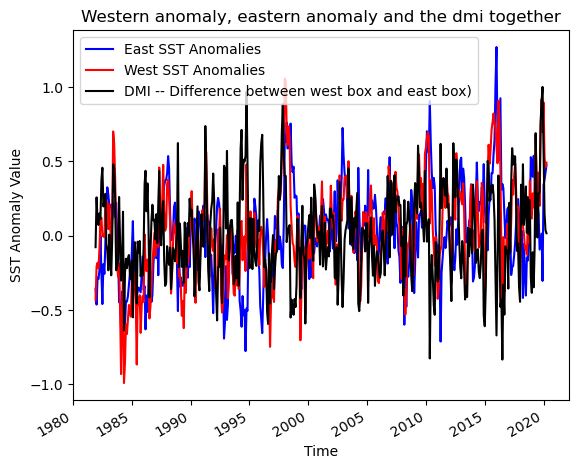

In [15]:
fig, ax = plt.subplots()

# Plotting the data
sst_anomalies_mean_east.plot(ax=ax, label='East SST Anomalies', color='blue')
sst_anomalies_mean_west.plot(ax=ax, color='red', label='West SST Anomalies')

# Calculating and plotting the difference
dmi.plot(ax=ax, color='black', linewidth=1.5, label='DMI -- Difference between west box and east box)')

# Adding a title and axis labels
ax.set_title('Western anomaly, eastern anomaly and the dmi together')
ax.set_xlabel('Time')
ax.set_ylabel('SST Anomaly Value')

# Adding a legend to indicate different colors for different lines
ax.legend()

# Display the plot
plt.show()

Now, DMI value of more than or equal to + 0.4 is defined as positive IOD and negative value of -0.4 or less is defined as negative IOD (Source: [NOAA](https://www.cpc.ncep.noaa.gov/products/international/ocean_monitoring/IODMI/DMI_month.html)). The values in between -0.4 and +0.4 is defined as neutral phase of IOD. 

Now, let's calculate the time when IOD was positive, negative and neutral IOD using the DMI we have just calculated. 

In [16]:
# Identify times when DMI is positive, when it is negative and when it is neutral
positive_IOD = dmi.where(dmi >= 0.4, drop=True)
negative_IOD = dmi.where(dmi <= -0.4, drop=True)
neutral_IOD = dmi.where((dmi < 0.4) & (dmi > -0.4), drop = True)

#### How many months do we have with Positive IOD, Negative IOD, and Neutral?

In [17]:
print('Positive IOD: ', positive_IOD.count(dim='time').values)
print('Negative IOD: ', negative_IOD.count(dim='time').values)
print('Neutral: ', neutral_IOD.count(dim='time').values)

counts=[positive_IOD.count(dim='time').values,
        negative_IOD.count(dim='time').values,
        neutral_IOD.count(dim='time').values]
print(counts)

Positive IOD:  52
Negative IOD:  39
Neutral:  370
[array(52), array(39), array(370)]


#### Time series of different phases of IOD

In [18]:
dmi = xr.Dataset({'sst': dmi}, coords={'time': dmi['time'], 'month': dmi['month']})

In [19]:
dmi

<xarray.Dataset>
Dimensions:  (time: 461)
Coordinates:
  * time     (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2020-04-01
    month    (time) int64 12 1 2 3 4 5 6 7 8 9 10 ... 6 7 8 9 10 11 12 1 2 3 4
Data variables:
    sst      (time) float32 -0.07754 0.2576 0.09887 ... 0.1473 0.03631 0.01635

In [20]:
# Identify times when DMI is positive, when it is negative and when it is neutral
positive_IOD = dmi['sst'].where(dmi['sst'] >= 0.4)
negative_IOD = dmi['sst'].where(dmi['sst'] <= -0.4)
neutral_IOD = dmi['sst'].where((dmi['sst'] > -0.4) & (dmi['sst'] < 0.4))

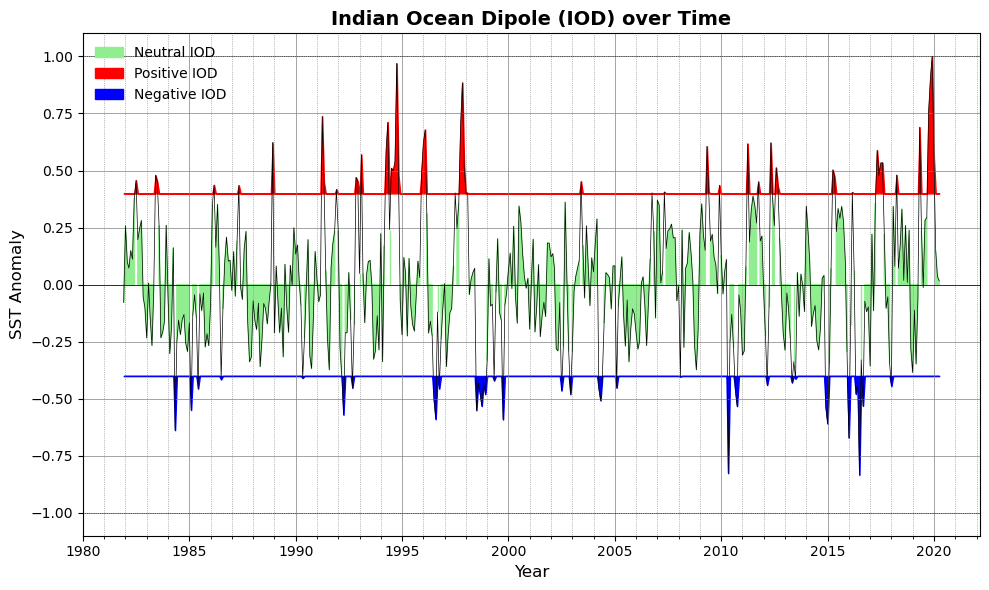

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Assuming 'dmi' and 'time' are already defined and structured as in your description

# Make sure that the y2 values in fill_between calls don't contain NaNs. For positive_IOD and negative_IOD, replace NaNs with the respective threshold values.
positive_IOD_filled = positive_IOD.fillna(0.4)  # Fill NaNs with the lower bound for positives
negative_IOD_filled = negative_IOD.fillna(-0.4)  # Fill NaNs with the upper bound for negatives

# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(10, 6))

# Now plot
ax.plot(dmi['time'], dmi['sst'], 'k', linewidth=0.5)  # Reduced the line width for better visibility of the fill

# Fill the area for neutral_IOD first
ax.fill_between(dmi['time'].values, dmi['sst'], where=(dmi['sst'] < 0.4) & (dmi['sst'] > -0.4), color='lightgreen', label='Neutral IOD')

# Then fill the area for positive_IOD and negative_IOD
ax.fill_between(dmi['time'].values, 0.4, positive_IOD_filled, where=positive_IOD_filled >= 0.4, color='red', label='Positive IOD', interpolate=True)
ax.fill_between(dmi['time'].values, -0.4, negative_IOD_filled, where=negative_IOD_filled <= -0.4, color='blue', label='Negative IOD', interpolate=True)

# Draw the zero line and the thresholds
ax.axhline(0, color='black', linewidth=0.5)
ax.axhline(1, color='black', linewidth=0.5, linestyle='dotted')
ax.axhline(-1, color='black', linewidth=0.5, linestyle='dotted')

# Set the title, labels, and legend
ax.set_title("Indian Ocean Dipole (IOD) over Time", fontsize=14, weight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('SST Anomaly', fontsize=12)
ax.legend(loc='best', frameon=False)

# Improve the x-axis labels with date formatting
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Major ticks every 5 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Minor ticks every year

# Add gridlines
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

# Set the layout to be tight to optimize space usage
plt.tight_layout()

# Save the figure with high quality
plt.savefig('IOD_timeseries_plot.png', dpi=300)

plt.show()

### Animation of IOD over time

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


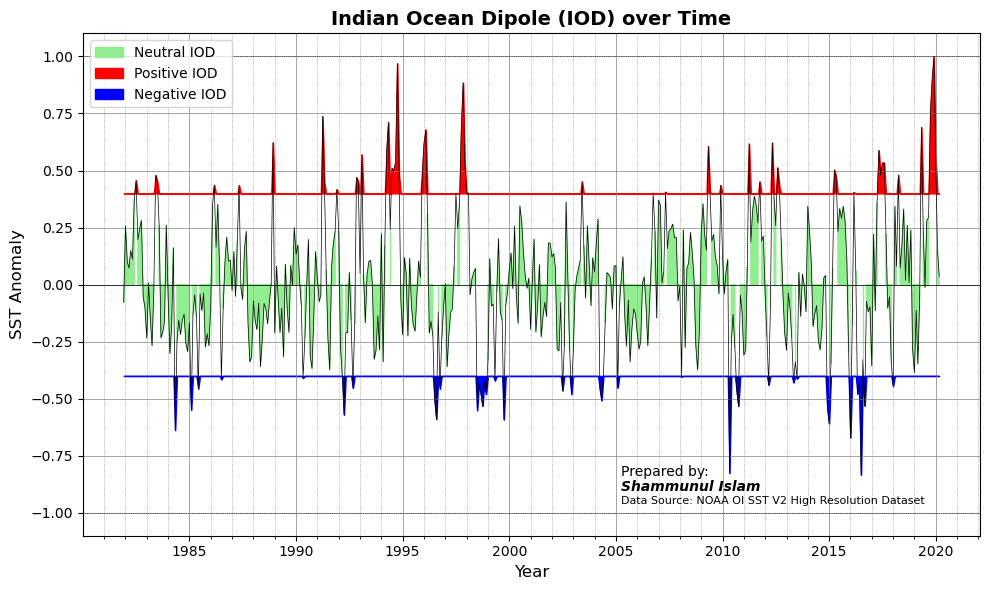

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation

# Make sure that the y2 values in fill_between calls don't contain NaNs. For positive_IOD and negative_IOD, replace NaNs with the respective threshold values.
positive_IOD_filled = positive_IOD.fillna(0.4)  # Fill NaNs with the lower bound for positives
negative_IOD_filled = negative_IOD.fillna(-0.4)  # Fill NaNs with the upper bound for negatives

# Initialize the figure and axis with a specific size
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize plot elements
line, = ax.plot([], [], 'k', linewidth=0.5)

# Update function for the animation
def update(frame):
    current_time = mdates.date2num(dmi['time'][:frame])  # Convert datetime to matplotlib format
    current_sst = dmi['sst'][:frame]

    # Update line plot
    line.set_data(current_time, current_sst)

    # Remove previous fills if they exist
    for coll in [coll for coll in ax.collections]:
        coll.remove()

    # Add new fill areas
    ax.fill_between(current_time, current_sst, where=(current_sst < 0.4) & (current_sst > -0.4), color='lightgreen', label='Neutral IOD')
    ax.fill_between(current_time, 0.4, positive_IOD_filled[:frame], where=positive_IOD_filled[:frame] >= 0.4, color='red', label='Positive IOD', interpolate=True)
    ax.fill_between(current_time, -0.4, negative_IOD_filled[:frame], where=negative_IOD_filled[:frame] <= -0.4, color='blue', label='Negative IOD', interpolate=True)

    return line,

# Set the title, labels, and legend
ax.set_title("Indian Ocean Dipole (IOD) over Time", fontsize=14, weight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('SST Anomaly', fontsize=12)
ax.legend(loc='best', frameon=False)

# Draw the zero line and the thresholds
ax.axhline(0, color='black', linewidth=0.5)
ax.axhline(1, color='black', linewidth=0.5, linestyle='dotted')
ax.axhline(-1, color='black', linewidth=0.5, linestyle='dotted')

# Improve the x-axis labels with date formatting
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Major ticks every 5 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Minor ticks every year

# Add gridlines
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

# Set the layout to be tight to optimize space usage
plt.tight_layout()

# Create the legend manually and place it at the top left
legend_elements = [plt.Line2D([0], [0], color='red', lw=4, label='Positive IOD'),
                   plt.Line2D([0], [0], color='lightgreen', lw=4, label='Neutral IOD'),
                   plt.Line2D([0], [0], color='blue', lw=4, label='Negative IOD')]
ax.legend(handles=legend_elements, loc='upper left')

# Create the animation
ani = FuncAnimation(fig, update, frames=len(dmi['time']), blit=True)

# Add text annotations
data_source_text = "Data Source: NOAA OI SST V2 High Resolution Dataset"
prepared_by_text1 = "Prepared by:"
prepared_by_text2 = "Shammunul Islam"

# Position the 'Data Source' text at the bottom
# ax.text(0.5, 0.01, data_source_text, ha='center', va='bottom', transform=fig.transFigure, fontsize=8)

# Position the 'Prepared by' text, with bold and italic for the name
# ax.text(0.5, 0.05, prepared_by_text, ha='center', va='bottom', transform=fig.transFigure, fontsize=8, style='italic')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.60, 0.14, prepared_by_text1, transform=ax.transAxes, fontsize=10, 
        verticalalignment='top')
ax.text(0.60, 0.11, prepared_by_text2, transform=ax.transAxes, fontsize=10, 
        verticalalignment='top', style='italic', weight = 'bold')
ax.text(0.60, 0.08, data_source_text, transform=ax.transAxes, fontsize=8, verticalalignment='top')

# Save the animation
ani.save('IOD_timeseries_animation.gif', writer='pillow', fps=20, dpi=300)
plt.legend()
# Show the plot
plt.show()

In [1]:
from IPython.display import display, Image

# Display the GIF in Jupyter Notebook
#display(Image(filename='IOD_timeseries_animation.gif'))

### Calculate Composites

### Load Temperature Data

In [21]:
# Load data for 1991 to 2010
ds=xr.open_mfdataset('APHRO_MA_TAVE_025deg_V1808.*.nc')
ds

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 280, time: 20088)
Coordinates:
  * lon      (lon) float64 60.12 60.38 60.62 60.88 ... 149.1 149.4 149.6 149.9
  * lat      (lat) float64 -14.88 -14.62 -14.38 -14.12 ... 54.38 54.62 54.88
  * time     (time) datetime64[ns] 1961-01-01 1961-01-02 ... 2015-12-31
Data variables:
    tave     (time, lat, lon) float32 dask.array<chunksize=(365, 280, 360), meta=np.ndarray>
    rstn     (time, lat, lon) float32 dask.array<chunksize=(365, 280, 360), meta=np.ndarray>
Attributes:
    title:    APHRO_MA V1808 daily temperature with 0.25deg grids

We can see that this is a daily data. I will now convert this into monthly data.

In [22]:
monthly_ds = ds.resample(time='1M').mean()

In [23]:
monthly_ds

<xarray.Dataset>
Dimensions:  (time: 660, lon: 360, lat: 280)
Coordinates:
  * time     (time) datetime64[ns] 1961-01-31 1961-02-28 ... 2015-12-31
  * lon      (lon) float64 60.12 60.38 60.62 60.88 ... 149.1 149.4 149.6 149.9
  * lat      (lat) float64 -14.88 -14.62 -14.38 -14.12 ... 54.38 54.62 54.88
Data variables:
    tave     (time, lat, lon) float32 dask.array<chunksize=(1, 280, 360), meta=np.ndarray>
    rstn     (time, lat, lon) float32 dask.array<chunksize=(1, 280, 360), meta=np.ndarray>

In [36]:
# Save the dataset to a NetCDF file
# monthly_ds.to_netcdf('monthly_temp_1961_2015.nc')

In [24]:
ds_temp = monthly_ds.tave.sel(time=slice(dmi['time'][0],dmi['time'][-1]))
ds_temp

<xarray.DataArray 'tave' (time: 409, lat: 280, lon: 360)>
dask.array<getitem, shape=(409, 280, 360), dtype=float32, chunksize=(1, 280, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-12-31 1982-01-31 ... 2015-12-31
  * lon      (lon) float64 60.12 60.38 60.62 60.88 ... 149.1 149.4 149.6 149.9
  * lat      (lat) float64 -14.88 -14.62 -14.38 -14.12 ... 54.38 54.62 54.88

In [35]:
# Save he file for later use
# ds_temp.to_netcdf('monthly_temp_1981_2015.nc')

In [25]:
ds_climo = ds_temp.groupby('time.month').mean()
ds_anoms = ds_temp.groupby('time.month')-ds_climo
ds_anoms

<xarray.DataArray 'tave' (time: 409, lat: 280, lon: 360)>
dask.array<getitem, shape=(409, 280, 360), dtype=float32, chunksize=(1, 280, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-12-31 1982-01-31 ... 2015-12-31
  * lon      (lon) float64 60.12 60.38 60.62 60.88 ... 149.1 149.4 149.6 149.9
  * lat      (lat) float64 -14.88 -14.62 -14.38 -14.12 ... 54.38 54.62 54.88
    month    (time) int64 12 1 2 3 4 5 6 7 8 9 10 ... 2 3 4 5 6 7 8 9 10 11 12

### Now select the dates that match Positive IOD, Neutral and Negative IOD

In [26]:
# Extract time values
time_values = ds_anoms['time'].values

# Print month values
print(time_values[0:10])

['1981-12-31T00:00:00.000000000' '1982-01-31T00:00:00.000000000'
 '1982-02-28T00:00:00.000000000' '1982-03-31T00:00:00.000000000'
 '1982-04-30T00:00:00.000000000' '1982-05-31T00:00:00.000000000'
 '1982-06-30T00:00:00.000000000' '1982-07-31T00:00:00.000000000'
 '1982-08-31T00:00:00.000000000' '1982-09-30T00:00:00.000000000']


In [27]:
# Extract month values
month_values = positive_IOD['time'].values

# Print month values
print(month_values[0:10])

['1981-12-01T00:00:00.000000000' '1982-01-01T00:00:00.000000000'
 '1982-02-01T00:00:00.000000000' '1982-03-01T00:00:00.000000000'
 '1982-04-01T00:00:00.000000000' '1982-05-01T00:00:00.000000000'
 '1982-06-01T00:00:00.000000000' '1982-07-01T00:00:00.000000000'
 '1982-08-01T00:00:00.000000000' '1982-09-01T00:00:00.000000000']


Fopr the ds_anoms dataset, all the time values are reported for the last day of a month while for positive_IOD (and other phases), the data is reported on the first day of every month. As the time coordinates are close but not exact for temperature data and IOD phase data, I will now use the `sel` method with the `method='nearest'` parameter to select the nearest available time points. 

In [28]:
positive_IOD_times = positive_IOD.dropna(dim='time')['time']
positive_IOD_temp = ds_anoms.sel(time=positive_IOD_times, method='nearest').mean(dim='time')
negative_IOD_times = negative_IOD.dropna(dim='time')['time']
negative_IOD_temp = ds_anoms.sel(time=negative_IOD_times, method='nearest').mean(dim='time')
neutral_IOD_times = neutral_IOD.dropna(dim='time')['time']
neutral_IOD_temp = ds_anoms.sel(time=neutral_IOD_times, method='nearest').mean(dim='time')

In [29]:
comp_temp = [positive_IOD_temp, negative_IOD_temp, neutral_IOD_temp]
comp_temp

[<xarray.DataArray 'tave' (lat: 280, lon: 360)>
 dask.array<mean_agg-aggregate, shape=(280, 360), dtype=float32, chunksize=(280, 360), chunktype=numpy.ndarray>
 Coordinates:
   * lon      (lon) float64 60.12 60.38 60.62 60.88 ... 149.1 149.4 149.6 149.9
   * lat      (lat) float64 -14.88 -14.62 -14.38 -14.12 ... 54.38 54.62 54.88,
 <xarray.DataArray 'tave' (lat: 280, lon: 360)>
 dask.array<mean_agg-aggregate, shape=(280, 360), dtype=float32, chunksize=(280, 360), chunktype=numpy.ndarray>
 Coordinates:
   * lon      (lon) float64 60.12 60.38 60.62 60.88 ... 149.1 149.4 149.6 149.9
   * lat      (lat) float64 -14.88 -14.62 -14.38 -14.12 ... 54.38 54.62 54.88,
 <xarray.DataArray 'tave' (lat: 280, lon: 360)>
 dask.array<mean_agg-aggregate, shape=(280, 360), dtype=float32, chunksize=(280, 360), chunktype=numpy.ndarray>
 Coordinates:
   * lon      (lon) float64 60.12 60.38 60.62 60.88 ... 149.1 149.4 149.6 149.9
   * lat      (lat) float64 -14.88 -14.62 -14.38 -14.12 ... 54.38 54.62 54.88]

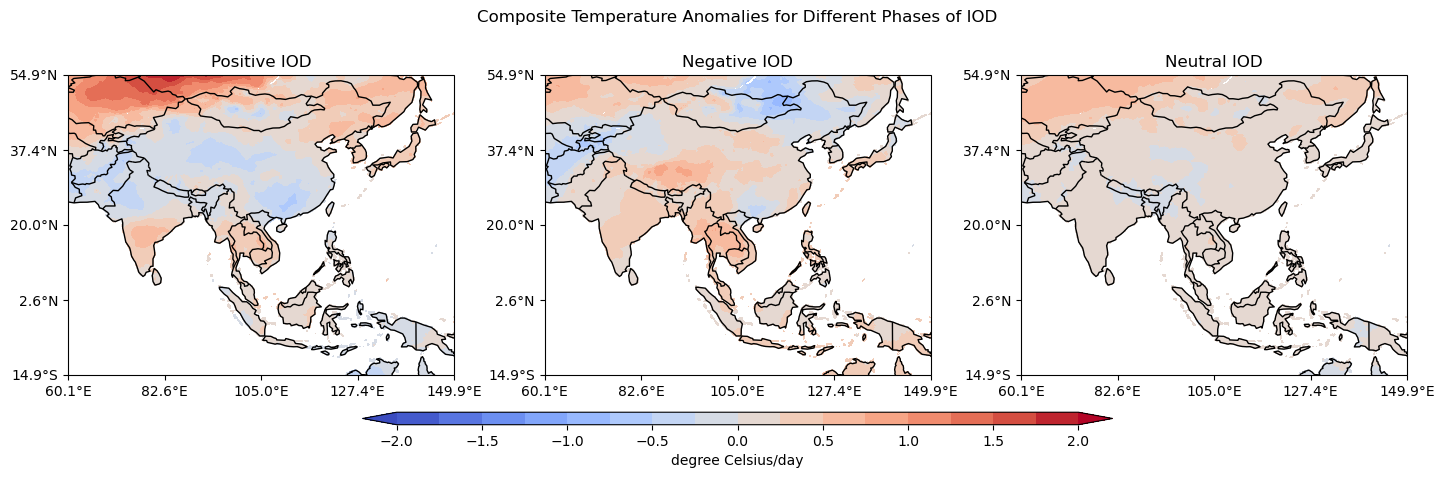

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature

labels = ['Positive IOD', 'Negative IOD', 'Neutral IOD']
clevs = np.arange(-2.0, 2.1, 0.25)

# Define the figure and each axis for 1 row and 3 columns
fig, axs = plt.subplots(nrows=1, ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(15, 5))  # Adjusted the figsize for a row layout

# Format function for longitude and latitude labels
def format_lon(value, tick_number):
    return f"{value:.1f}°E" if value >= 0 else f"{abs(value):.1f}°W"

def format_lat(value, tick_number):
    return f"{value:.1f}°N" if value >= 0 else f"{abs(value):.1f}°S"

# Loop over all the IOD types and plot
for i, iod in enumerate(comp_temp):
    data = comp_temp[i]

    # Add the cyclic point
    data, lons = add_cyclic_point(data, coord=comp_temp[i]['lon'])

    # Determine the data range for longitude and latitude
    min_lon, max_lon = min(comp_temp[i]['lon']), max(comp_temp[i]['lon'])
    min_lat, max_lat = min(comp_temp[i]['lat']), max(comp_temp[i]['lat'])

    # Contour plot
    cs = axs[i].contourf(lons, comp_temp[i]['lat'], data, clevs,
                         transform=ccrs.PlateCarree(),
                         cmap='coolwarm', extend='both')

    # Set the extent of the map to the data range
    axs[i].set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

    # Longitude and Latitude labels
    axs[i].set_xticks(np.linspace(min_lon, max_lon, num=5), crs=ccrs.PlateCarree())
    axs[i].set_yticks(np.linspace(min_lat, max_lat, num=5), crs=ccrs.PlateCarree())
    axs[i].xaxis.set_major_formatter(plt.FuncFormatter(format_lon))
    axs[i].yaxis.set_major_formatter(plt.FuncFormatter(format_lat))

    # Add country borders
    axs[i].add_feature(cfeature.BORDERS, edgecolor='black')

    axs[i].set_title(labels[i])
    axs[i].coastlines()

# Colorbar and layout adjustments
fig.subplots_adjust(bottom=0.25, top=0.85, left=0.05, right=0.95, wspace=0.2, hspace=0.5)
cbar_ax = fig.add_axes([0.25, 0.15, 0.5, 0.025])  # Adjusted the position for the row layout
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='degree Celsius/day')

plt.suptitle('Composite Temperature Anomalies for Different Phases of IOD')
plt.savefig('composite_anomalies_IOD.png', dpi=300, bbox_inches='tight')
plt.show()